## $\S$ 3.4.3. Discussion: Subset Selection, Ridge Regression, and the Lasso

### Explicit solutions in the ideal situation

In the case of an orthonormal input matrix $\mathbf{X}$, the three procecures have explicit solutions as below.

* Best subset (size $M$) drops all variables with coefficients smaller than the $M$th largest; this is a form of "hard-thresholding".  
\begin{equation}
\hat\beta_j\cdot I\left( \lvert\hat\beta_j\rvert \ge \lvert\hat\beta_{(M)}\rvert \right)
\end{equation}
* Ridge does a proportional shrinkage.  
\begin{equation}
\frac{\hat\beta_j}{1+\lambda}
\end{equation}
* Lasso translates each coefficient by a constant factor $\lambda$, truncating at zero. This is called "soft-thresholding".  
\begin{equation}
\text{sign}\left( \hat\beta_j \right)\left( \lvert\hat\beta_j\rvert - \lambda \right)_+
\end{equation}

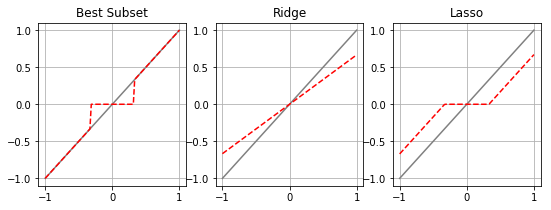

In [22]:
import scipy
import matplotlib.pyplot as plt

x = scipy.linspace(-1, 1, 100)

y_best_subset = x.copy()
y_best_subset[scipy.absolute(y_best_subset) <= .33] = 0

y_ridge = x/1.5

y_lasso = x.copy()
y_lasso[scipy.absolute(y_lasso) <= .33] = 0
y_lasso[y_lasso > .33] -= .33
y_lasso[y_lasso < -.33] += .33
        

fig34 = plt.figure(figsize=(9, 3))
ax1 = fig34.add_subplot(1, 3, 1)
ax1.plot(x, x, color='gray')
ax1.plot(x, y_best_subset, 'r--')
ax1.set_title('Best Subset')
ax1.grid()

ax2 = fig34.add_subplot(1, 3, 2)
ax2.plot(x, x, color='gray')
ax2.plot(x, y_ridge, 'r--')
ax2.set_title('Ridge')
ax2.grid()

ax3 = fig34.add_subplot(1, 3, 3)
ax3.plot(x, x, color='gray')
ax3.plot(x, y_lasso, 'r--')
ax3.set_title('Lasso')
ax3.grid()
plt.show()

### Back to the reality; the nonorthonormal case

FIGURE 3.11 helps understand their relationship. Please consult with the textbook.

### Generalization to Bayes estimates

Consider the criterion, for $q \ge 0$,

\begin{equation}
\tilde\beta = \arg\min_\beta \left\lbrace \sum_{i=1}^N \left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 + \lambda\sum_{j=1}^p\lvert\beta_j\rvert^q\right\rbrace
\end{equation}

See FIGURE 3.12 in the textbook for the contours of $\sum_j\lvert\beta_j\rvert^q$.

Thinking of $\lvert\beta_j\rvert^q$ as the log-prior density for $\beta_j$, these are also the equicontours of the prior distrobution of the parameters.
* $q=0$ $\Rightarrow$ variable subset selction, as the penalty simply counts the number of nonzero parameters,
* $q=1$ $\Rightarrow$ Laplace distribution with density  

\begin{equation}
\frac{1}{2\tau}\exp\left(-\lvert\beta\rvert/\tau\right),
\end{equation}
where $\tau = 1/\lambda$. In this view, the lasso, ridge, and best subset selection are Bayes estimates with different priors. Note, however, that they are derived as posterior modes, that is, maximizers of the posterior. It is more common to use the mean of the posterior as the Bayes estimate. Ridge solution is also the posterior mean, but the lasso and best subset selection are not.

Note that the lasso case is the smallest $q$ such that the constraint region is convex; non-convext constraint regions make the optimization problem more difficult.

We might try using other values of $q$ besides $0$, $1$, or $2$. Although one might consider estimating $q$ from data, our experience is that it is not worth the effort for the extra variance incurred.

Although this is the case, with $q \gt 1$, $\lvert\beta_j\rvert^q$ is differentiable at $0$, and so does not share the ability of lasso ($q=1$) for setting coefficients exactly to zero. Partly for this reason as well as for computational tractability, Zou and Hastie (2005) introduced the *elastic-net* penalty, introduced in $\S$ 18.4.